In [2]:
import numpy as np
import kdv
import besseTBC
import matplotlib.pyplot as plt
import cPickle as pickle
import generalFunctions as gF
import besseSchwarz as bS

%matplotlib inline

# Speed of convergence for different $dt$

In [59]:
np.append(np.arange(4.9,6.1,0.01),np.append(np.arange(8.8,9.7,0.01),np.arange(14.3,15.4,0.01))).shape

(320,)

In [3]:
reload(bS)
reload (besseTBC)

#cLs = np.arange(0.0,2.25,0.01)
#cLs = np.arange(-10,10,0.1)
cLs = np.arange(-10,20,0.05)
cRs = np.copy(cLs)
dts = np.arange(0.005,0.205,0.005)
#dts = np.arange(0.005,0.21,0.05)
computeExactSolution = False

#cLs = np.arange(-10,20,0.5)
#cRs = np.copy(cLs)
#dts = np.array([0.14])


#cLs = np.arange(-10,0.05,0.05)
#cRs = np.copy(cLs)
#dts = np.arange(0.005,0.20,0.005)

### Detailing
#cLs2 = np.append(np.arange(4.9,6.1,0.01),np.append(np.arange(8.8,9.7,0.01),np.arange(14.3,15.4,0.01)))
#cLs = np.append(cLs,cLs2)
#cRs = np.copy(cLs)
#dts = np.append(np.arange(0.025,0.04,0.005),np.append(np.arange(0.06,0.075,0.005),np.arange(0.12,0.14,0.005)))
#dts = np.array([0.03,0.045,0.095,0.13,0.17,0.175])

#cLs = np.arange(11.0,12.5,0.005)
#cRs = np.copy(cLs)
#dts = np.array([0.09])

L = 6.
xmin = -L
xmax = L
N = 501
U2 = 1.


dx = (xmax-xmin)/N
x = np.linspace(xmin,xmax,N)

dx = np.diff(x)[0]

x1 = x[0:x.size/2+1]
x2 = x[x.size/2:]


# Main

filename = 'dx500multipleDtFinalVersionMarshal.json'
testsSpeedtestDiffdt = besseTBC.loadTests(filename)
print(testsSpeedtestDiffdt.keys())

t0 = 0

for dt in dts :
    
    print(dt)
    
    if t0 == 0. :
        u = besseTBC.initGauss(x)
    else :
        u = besseTBC.exactSolution(x,t0,besseTBC.initGauss)

    
    if str(dt) in testsSpeedtestDiffdt.keys() :
        tests = testsSpeedtestDiffdt[str(dt)]
    else :
        tests = {}
        
    tmax = t0 + dt

    coefTBC = np.zeros((1,2))
    uallref,tallref = besseTBC.runDispKdV(x,u,t0,tmax,1., coefTBC , periodic = 0, vardt = False, dt = dt,
                                           order = 0, modifyDiscret = 1,
                                           useTBCL = False, useTBCR = False)  
    
    tests = bS.optimizeSpeed(x,x1,x2,u,uallref,cLs,cRs,tests,t0,tmax,dx,dt,maxiter = 100,equalCoef=True,
                             criteria="error", epsCV=1e-9, DDMmethod = bS.ASM, modifyDiscret=0)
    
    testsSpeedtestDiffdt[str(dt)] = tests
    
besseTBC.saveTests(testsSpeedtestDiffdt,filename)

[]
0.005

*** Computing solution ...
*** End of computation ***

*** Computing solution ...


besseSchwarz.py:440: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uref != None:


*** End of computation ***
(-10.0, -10.0, 99, 4.6423792112337046e-05)

*** Computing solution ...
*** End of computation ***
(-9.9499999999999993, -9.9499999999999993, 99, 4.5477410636446381e-05)

*** Computing solution ...
*** End of computation ***
(-9.8999999999999986, -9.8999999999999986, 99, 4.4537701063954797e-05)

*** Computing solution ...
*** End of computation ***
(-9.8499999999999979, -9.8499999999999979, 99, 4.3604816406932405e-05)

*** Computing solution ...
*** End of computation ***
(-9.7999999999999972, -9.7999999999999972, 99, 4.2678910385010508e-05)

*** Computing solution ...
*** End of computation ***
(-9.7499999999999964, -9.7499999999999964, 99, 4.176013679008215e-05)

*** Computing solution ...
*** End of computation ***
(-9.6999999999999957, -9.6999999999999957, 99, 4.0848649398897347e-05)

*** Computing solution ...
*** End of computation ***
(-9.649999999999995, -9.649999999999995, 99, 3.9944602390001463e-05)

*** Computing solution ...
*** End of computation 

In [381]:
import struct

reload(besseTBC)
reload(bS)

filename = 'dx250multipleDtFinalVersionMarshal.json'
allTests = besseTBC.loadTests(filename)
print(allTests.keys())


['0.105', '0.095', '0.1', '0.125', '0.075', '0.145', '0.08', '0.09', '0.02', '0.03', '0.01', '0.06', '0.07', '0.04', '0.05', '0.175', '0.025', '0.195', '0.005', '0.115', '0.085', '0.2', '0.135', '0.065', '0.155', '0.045', '0.15', '0.14', '0.17', '0.16', '0.11', '0.13', '0.12', '0.19', '0.18', '0.055', '0.165', '0.035', '0.185', '0.015']


In [104]:
allTests = testsSpeedtestDiffdt
allTest2 = allTests
allTests = {}
for key in allTest2.keys() :
    if eval(key) <= 0.08:
        allTests[key] = allTest2[key]
    
print(allTests.keys())


['0.08', '0.01', '0.055', '0.02', '0.03', '0.075', '0.06', '0.07', '0.04', '0.05', '0.065', '0.025', '0.045', '0.035', '0.005', '0.015']


['0.005' '0.025' '0.05']
t0 = 0.005000 --> min it = 8 for cL = cR = 3.350000 and error = 7.175468e-10
t0 = 0.025000 --> min it = 10 for cL = cR = -2.850000 and error = 2.257008e-10
t0 = 0.050000 --> min it = 8 for cL = cR = -4.400000 and error = 2.377296e-12
['0.005' '0.025' '0.05']
t0 = 0.005000 --> min it = 8 for cL = cR = 3.350000 and error = 7.175468e-10
t0 = 0.025000 --> min it = 10 for cL = cR = -2.850000 and error = 2.257008e-10
t0 = 0.050000 --> min it = 8 for cL = cR = -4.400000 and error = 2.377296e-12


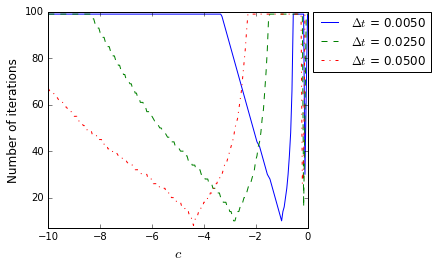

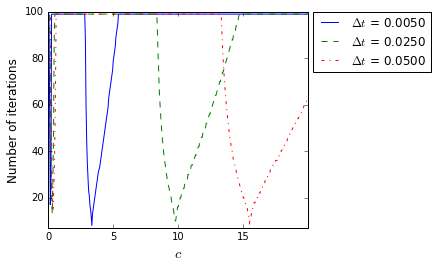

In [9]:
reload(bS)

keys = np.array([0.005,0.025,0.05,0.1,0.15,0.2])
keys = np.array([0.005,0.025,0.05])


someTests = {}
for key in keys :
    someTests[str(key)] = allTests[str(key)]
#t0 = 0.
#test0 = bS.getTestResultVariableT0(allTests,t0)
bS.plotIterationsxCoef(someTests,r"$\Delta t$",titleCompl = r"$N = 500$",legloc=(1.1,0.),
                      savePath = "figures/TBCbesse/NiterxCoefVarDtdx500FinalVersionNMarshal", differentLines = True,xmax=0.)
bS.plotIterationsxCoef(someTests,r"$\Delta t$",titleCompl = r"$N = 500$",legloc=(1.1,0.),
                      savePath = "figures/TBCbesse/NiterxCoefVarDtdx500FinalVersionPMarshal", differentLines = True, xmin=0.)
#bS.plotErrorEvolution(test0,3,titleCompl=r'ASM; $t_0$ = %.3f'%t0, legloc=(1.1,0.))

(array([ 0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,
        0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,  0.08 ,
        0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,  0.12 ,
        0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,  0.16 ,
        0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,  0.2  ]), array([  1.65 ,   2.65 ,   3.45 ,   4.2  ,   4.9  ,   5.52 ,   6.1  ,
         6.7  ,   7.23 ,   7.75 ,   8.25 ,   8.75 ,   9.25 ,   9.7  ,
        10.15 ,  10.6  ,  11.05 ,  11.475,  11.9  ,  12.3  ,  12.7  ,
        13.1  ,  13.5  ,  13.9  ,  14.3  ,  14.65 ,  15.05 ,  15.4  ,
        15.75 ,  16.15 ,  16.5  ,  16.85 ,  17.2  ,  17.53 ,  17.87 ,
        18.2  ,  18.55 ,  18.9  ,  19.2  ,  19.55 ]))
(array([ 0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,
        0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,  0.08 ,
        0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,  0.12 ,
        0.125,  0.13 ,  

(-6.0, 0.0)

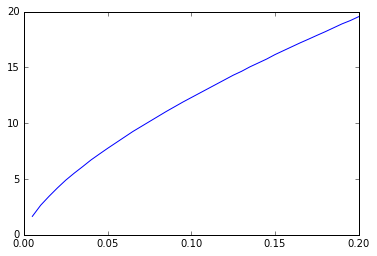

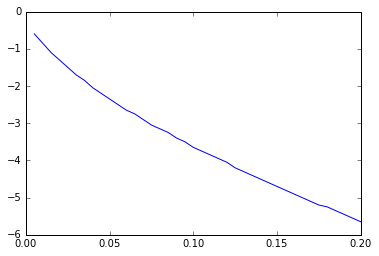

In [383]:
reload(bS)

plt.figure()
a = bS.getTestResumeVariableT0(allTests,barrierN=.7,barrierP=-.7)
ls = np.zeros((1,2))
for key in a.keys():
    lign = np.array([eval(key),a[key][7][0]])
    ls = np.vstack((ls,lign))
    
ls = np.delete(ls,0,0)
idxOrder = np.argsort(ls[:,0])
lsOrderedDtP = ls[idxOrder,:]
plt.plot(lsOrderedDtP[:,0],lsOrderedDtP[:,1])
print(lsOrderedDtP[:,0],lsOrderedDtP[:,1])
plt.ylim()


plt.figure()
a = bS.getTestResumeVariableT0(allTests)
ls = np.zeros((1,2))
for key in a.keys():
    lign = np.array([eval(key),a[key][6][0]])
    ls = np.vstack((ls,lign))
    
ls = np.delete(ls,0,0)
idxOrder = np.argsort(ls[:,0])
lsOrderedDtN = ls[idxOrder,:]
plt.plot(lsOrderedDtN[:,0],lsOrderedDtN[:,1])
print(lsOrderedDtN[:,0],lsOrderedDtN[:,1])
plt.ylim()


(57.167663889611035, -0.0085961503682607798, 0.99999453945733185)


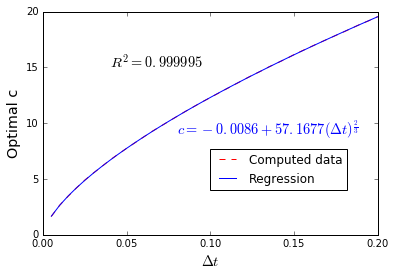

In [388]:
#### Regression : c = a + b\sqrt(dt)

from scipy import stats

X = lsOrderedDtP[:,0]
Y = lsOrderedDtP[:,1]
#X2 = np.sqrt(X)
X2 = np.power(X,2./3.)

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y)
R2 = r_value**2
print(slope,intercept,R2)


Y2 = intercept + slope*X2

plt.figure()
plt.plot(X,Y,color='red',linestyle="--",label="Computed data")
plt.plot(X,Y2,label="Regression")
plt.ylabel("Optimal c",fontsize="x-large")
plt.xlabel(r"$\Delta t$",fontsize="x-large")
plt.annotate(r"$c = %.4f + %.4f(\Delta t)^{\frac{2}{3}}$"%(intercept,slope),xy=(0.08, 9.),
             fontsize="x-large",color="blue")
plt.annotate(r"$R^2 = %.6f$" %R2,xy=(0.04,15),fontsize="x-large")
plt.legend(loc = (0.5,0.2))
plt.savefig("figures/TBCbesse/regressionDtFinalVersionPMarshal250.png")

#print(X2.shape,Y.shape)
#reg.fit(X2.reshape(-1,1),Y)
#regCoefs = reg.coef_
#intercept = reg.intercept_
#print(reg.predict(X2.reshape(-1,1)))
#print(Y2)
#print(Y)

(-16.143207994228945, -0.14133881572572715, 0.99980772668810702)


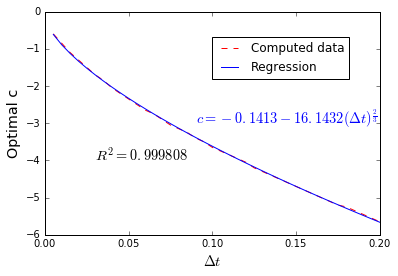

In [391]:
#### Regression : c = a + b\sqrt(dt)

from scipy import stats

X = lsOrderedDtN[:,0]
Y = lsOrderedDtN[:,1]
X2 = np.power(X,2./3.)

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y)
R2 = r_value**2
print(slope,intercept,R2)


Y2 = intercept + slope*X2

plt.figure()
plt.plot(X,Y,color='red',linestyle="--",label="Computed data")
plt.plot(X,Y2,label="Regression")
plt.ylabel("Optimal c",fontsize="x-large")
plt.xlabel(r"$\Delta t$",fontsize="x-large")
if slope > 0:
    eq = r"$c = %.4f + %.4f(\Delta t)^{\frac{2}{3}}$"%(intercept,slope)
else:
    eq = r"$c = %.4f %.4f(\Delta t)^{\frac{2}{3}}$"%(intercept,slope)
plt.annotate(eq,xy=(0.09, -3.),fontsize="x-large",color="blue")
plt.annotate(r"$R^2 = %.6f$" %R2,xy=(0.03,-4.),fontsize="x-large")
plt.legend(loc = (0.5,0.7))
plt.savefig("figures/TBCbesse/regressionDtFinalVersionNMarshal250.png")

# Speed of convergence for different $dx$

In [17]:
#cLs = np.arange(0.0,1.01,0.01)
cLs = np.arange(-10,20,0.1)
cRs = np.copy(cLs)
Ns = np.array([126,201,251,301,351,401,451,501,551,601,651,701,751,801,851,901,951,1001])
#Ns = np.arange(126,1001,25)
dxs = 12./(Ns-1.)
computeExactSolution = False

filename = 'dt8em2multipledxFinalVersionMarshal.json'
testsSpeedtestDiffdx = besseTBC.loadTests(filename)

for N in Ns :

    print(N)
    
    L = 6.
    xmin = -L
    xmax = L
    U2 = 1.

    dt = 0.08

    dx = (xmax-xmin)/N
    x = np.linspace(xmin,xmax,N)

    dx = np.diff(x)[0]

    x1 = x[0:x.size/2+1]
    x2 = x[x.size/2:]


    # Main

    t0 = 0
  
    if t0 == 0. :
        u = besseTBC.initGauss(x)
    else :
        u = besseTBC.exactSolution(x,t0,besseTBC.initGauss)

    
    if str(dx) in testsSpeedtestDiffdx.keys() :
        tests = testsSpeedtestDiffdx[str(dx)]
    else :
        tests = {}
        
    tmax = t0 + dt

    coefTBC = np.zeros((1,2))
    uallref,tallref = besseTBC.runDispKdV(x,u,t0,tmax,1., coefTBC , periodic = 0, vardt = False, dt = dt,
                                           order = 0, modifyDiscret = 1,
                                           useTBCL = False, useTBCR = False)  
    
    tests = bS.optimizeSpeed(x,x1,x2,u,uallref,cLs,cRs,tests,t0,tmax,dx,dt,maxiter = 100,equalCoef=True,
                             criteria="error", epsCV=1e-9, DDMmethod = bS.ASM, modifyDiscret=0)
    
    testsSpeedtestDiffdx[str(dx)] = tests
    
besseTBC.saveTests(testsSpeedtestDiffdx,filename)

126

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
(-10.0, -10.0, 99, 0.0013681020896533927)

*** Computing solution ...
*** End of computation ***
(-9.9000000000000004, -9.9000000000000004, 99, 0.0012622686123475227)

*** Computing solution ...
*** End of computation ***
(-9.8000000000000007, -9.8000000000000007, 99, 0.0011619020478575073)

*** Computing solution ...
*** End of computation ***
(-9.7000000000000011, -9.7000000000000011, 99, 0.0010669055974938031)

*** Computing solution ...
*** End of computation ***
(-9.6000000000000014, -9.6000000000000014, 99, 0.00097717493221420332)

*** Computing solution ...
*** End of computation ***
(-9.5000000000000018, -9.5000000000000018, 99, 0.00089259842428229396)

*** Computing solution ...
*** End of computation ***
(-9.4000000000000021, -9.4000000000000021, 99, 0.00081305743610480359)

*** Computing solution ...
*** End of computation ***
(-9.3000000000000025, -9.30000000000

In [397]:
filename = 'dt2em2multipledxFinalVersionMarshal.json'
allTests2 = besseTBC.loadTests(filename)
print(allTests2.keys())

['0.0141176470588', '0.08', '0.048', '0.0171428571429', '0.02', '0.03', '0.06', '0.04', '0.0266666666667', '0.024', '0.0184615384615', '0.0218181818182', '0.012', '0.0342857142857', '0.0126315789474', '0.015', '0.016', '0.0133333333333']


In [393]:
reload(bS)
print(allTests2.keys())

keys = np.array([12./250,12./400,12./500.,12./700,12./800,12./1000])
#keys = keys+1
someTests2 = {}
for key in keys :
    someTests2[str(key)] = allTests2[str(key)]
    
#t0 = 0.
#test0 = bS.getTestResultVariableT0(allTests,t0)
bS.plotIterationsxCoef(someTests2,r"$\Delta x$",titleCompl = r"$\Delta t = 0.01$",legloc=(1.1,0.),txtFmt = "%.4f",
                       savePath = "figures/TBCbesse/NiterxCoefVarDxdt8em2FinalVersionN",
                       differentLines = True, xmax = 0.)
bS.plotIterationsxCoef(someTests2,r"$\Delta x$",titleCompl = r"$\Delta t = 0.01$",legloc=(1.1,0.),txtFmt = "%.4f",
                       savePath = "figures/TBCbesse/NiterxCoefVarDxdt8em2FinalVersionP",
                       differentLines = True, xmin = 0.)
#bS.plotErrorEvolution(test0,3,titleCompl=r'ASM; $t_0$ = %.3f'%t0, legloc=(1.1,0.))

NameError: name 'allTests2' is not defined

In [398]:
### Get optimal coefficienct x dx  (for positive coefficients)

a = bS.getTestResumeVariableT0(allTests2)
ls = np.zeros((1,2))
for key in a.keys():
    lign = np.array([eval(key),a[key][7][0]])
    ls = np.vstack((ls,lign))

#ls = np.delete(ls,0,0)
#ls = np.delete(ls,0,0)
delLines = []
for i in range(ls.shape[0]):
    if ls[i,1] == 0:
        delLines.append(i)

ls = np.delete(ls,delLines,0)

print(ls)

idxOrder = np.argsort(ls[:,0])
lsOrderedDxP = ls[idxOrder,:]



### Get optimal coefficienct x dx  (for negatve coefficients)

a = bS.getTestResumeVariableT0(allTests2)
ls = np.zeros((1,2))
for key in a.keys():
    lign = np.array([eval(key),a[key][6][0]])
    ls = np.vstack((ls,lign))

#ls = np.delete(ls,0,0)
#ls = np.delete(ls,0,0)
delLines = []
for i in range(ls.shape[0]):
    if ls[i,1] == 0:
        delLines.append(i)

ls = np.delete(ls,delLines,0)

print(ls)

idxOrder = np.argsort(ls[:,0])
lsOrderedDxN = ls[idxOrder,:]

[[  0.01411765  14.3       ]
 [  0.08         2.5       ]
 [  0.048        4.2       ]
 [  0.01714286  11.8       ]
 [  0.02        10.1       ]
 [  0.03         6.7       ]
 [  0.06         3.4       ]
 [  0.04         5.1       ]
 [  0.02666667   7.6       ]
 [  0.024        8.4       ]
 [  0.01846154  10.9       ]
 [  0.02181818   9.2       ]
 [  0.012       16.8       ]
 [  0.01333333  15.1       ]
 [  0.01263158  16.        ]
 [  0.015       13.5       ]
 [  0.016       12.6       ]
 [  0.03428571   5.9       ]]
[[ 0.01411765 -4.        ]
 [ 0.08       -0.9       ]
 [ 0.048      -1.3       ]
 [ 0.01714286 -3.4       ]
 [ 0.02       -2.9       ]
 [ 0.03       -2.        ]
 [ 0.06       -1.1       ]
 [ 0.04       -1.6       ]
 [ 0.02666667 -2.2       ]
 [ 0.024      -2.4       ]
 [ 0.01846154 -3.1       ]
 [ 0.02181818 -2.7       ]
 [ 0.012      -4.7       ]
 [ 0.01333333 -4.3       ]
 [ 0.01263158 -4.5       ]
 [ 0.015      -3.8       ]
 [ 0.016      -3.6       ]
 [ 0.03428571 -1.8

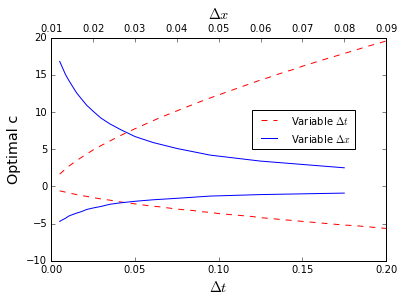

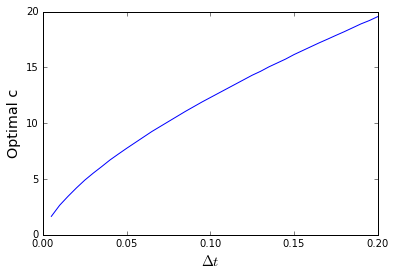

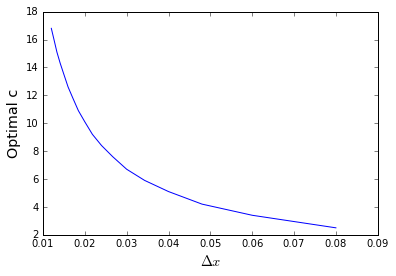

In [403]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
line1, = ax1.plot(lsOrderedDtN[:,0],lsOrderedDtN[:,1],color='red',linestyle="--")
line2, = ax2.plot(lsOrderedDxN[:,0],lsOrderedDxN[:,1],color='blue',linestyle="-")
line1, = ax1.plot(lsOrderedDtP[:,0],lsOrderedDtP[:,1],color='red',linestyle="--")
line2, = ax2.plot(lsOrderedDxP[:,0],lsOrderedDxP[:,1],color='blue',linestyle="-")
ax1.set_xlabel(r"$\Delta t$", fontsize = "x-large")
ax2.set_xlabel(r"$\Delta x$", fontsize = "x-large")
ax1.set_ylabel("Optimal c", fontsize = "x-large")
legend = plt.legend((line1,line2),(r"Variable $\Delta t$",r"Variable $\Delta x$"),loc=(0.6,0.5))
for label in legend.get_texts():
    label.set_fontsize('medium')
#plt.savefig("figures/TBCbesse/OptimalCoefVarDxDtFinalVersionMarshal8em2.png")

plt.figure()
plt.plot(lsOrderedDtP[:,0],lsOrderedDtP[:,1])
plt.xlabel(r"$\Delta t$", fontsize = "x-large")
plt.ylabel("Optimal c", fontsize = "x-large")
plt.savefig("figures/TBCbesse/OptimalCoefVarDxDtFinalVersionMarshal2em2OnlyDt.png")

plt.figure()
plt.plot(lsOrderedDxP[:,0],lsOrderedDxP[:,1])
plt.xlabel(r"$\Delta x$", fontsize = "x-large")
plt.ylabel("Optimal c", fontsize = "x-large")
plt.savefig("figures/TBCbesse/OptimalCoefVarDxDtFinalVersionMarshal2em2OnlyDx.png")

[ 0.012       0.01263158  0.01333333  0.01411765  0.015       0.016
  0.01714286  0.01846154  0.02        0.02181818  0.024       0.02666667
  0.03        0.03428571  0.04        0.048       0.06        0.08      ]
(0.20163467492257081, 0.010560715515616437, 0.9999552597321959)


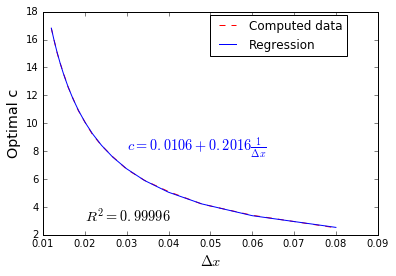

In [204]:
#### Regression : c = a + b\sqrt(dt) for positive coefficients

from scipy import stats

X = lsOrderedDxP[:,0]
print(X)
Y = lsOrderedDxP[:,1]
X2 = 1./X

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y)
R2 = r_value**2
print(slope,intercept,R2)


Y2 = intercept + slope*X2

plt.figure()
plt.plot(X,Y,color='red',linestyle="--",label="Computed data")
plt.plot(X,Y2,label="Regression")
plt.ylabel("Optimal c",fontsize="x-large")
plt.xlabel(r"$\Delta x$",fontsize="x-large")
plt.annotate(r"$c = %.4f + %.4f \frac{1}{\Delta x}$"%(intercept,slope),xy=(0.03, 8.),fontsize="x-large",color="blue")
plt.annotate(r"$R^2 = %.5f$" %R2,xy=(0.02,3),fontsize="x-large")
plt.legend(loc = (0.5,0.8))
#plt.savefig("figures/TBCbesse/regressionDxFinalVersionMarshalP8em2.png")




[ 0.012       0.01263158  0.01333333  0.01411765  0.015       0.016
  0.01714286  0.01846154  0.02        0.02181818  0.024       0.02666667
  0.03        0.03428571  0.04        0.048       0.06        0.08      ]
(-0.054117647058815117, -0.20130718954290705, 0.99940605059437715)


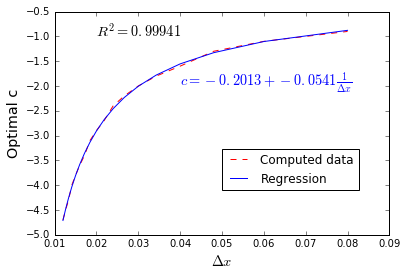

In [214]:
#### Regression : c = a + b\sqrt(dt) for negative coefficients

from scipy import stats

X = lsOrderedDxN[:,0]
print(X)
Y = lsOrderedDxN[:,1]
X2 = 1./X

slope, intercept, r_value, p_value, std_err = stats.linregress(X2,Y)
R2 = r_value**2
print(slope,intercept,R2)


Y2 = intercept + slope*X2

plt.figure()
plt.plot(X,Y,color='red',linestyle="--",label="Computed data")
plt.plot(X,Y2,label="Regression")
plt.ylabel("Optimal c",fontsize="x-large")
plt.xlabel(r"$\Delta x$",fontsize="x-large")
plt.annotate(r"$c = %.4f + %.4f \frac{1}{\Delta x}$"%(intercept,slope),xy=(0.04, -2.),fontsize="x-large",color="blue")
plt.annotate(r"$R^2 = %.5f$" %R2,xy=(0.02,-1.),fontsize="x-large")
plt.legend(loc = (0.5,0.2))
#plt.savefig("figures/TBCbesse/regressionDxFinalVersionMarshalN8em2.png")

In [44]:
filename = 'dt2em2multipleN.json'
allTests = besseTBC.loadTests(filename)

['999', '249', '124', '499']
t0 = 124.000000 --> min it = 99 for cL = cR = 0.000000 and error = 2.752710e-02
t0 = 249.000000 --> min it = 7 for cL = cR = 0.300000 and error = 2.985692e-11
t0 = 999.000000 --> min it = 6 for cL = cR = 0.280000 and error = 2.494492e-11
t0 = 499.000000 --> min it = 6 for cL = cR = 0.290000 and error = 6.428966e-10


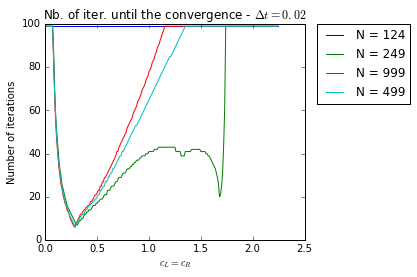

In [45]:
reload(bS)
print(allTests.keys())
#t0 = 0.
#test0 = bS.getTestResultVariableT0(allTests,t0)
bS.plotIterationsxCoef(allTests,"N",titleCompl = r"$\Delta t = 0.02$",legloc=(1.1,0.),txtFmt = "%d",
                      savePath = "figures/TBCbesse/NiterxCoefVarDxdt2em2")
#bS.plotErrorEvolution(test0,3,titleCompl=r'ASM; $t_0$ = %.3f'%t0, legloc=(1.1,0.))

# Regression (two variables)

In [314]:
#cLs = np.arange(0.0,1.01,0.01)
cLs = np.arange(-20.,25.1,0.1)
cLs = np.arange(2.4,2.73,0.001)
cRs = np.copy(cLs)
Ns = np.array([126,201,251,301,351,401,451,501,551,601,651,701,751,801,851,901,951,1001])
#Ns = np.arange(126,1001,25)
dxs = 12./(Ns-1.)
computeExactSolution = False

pairs = np.array([(0.001,50),(0.002,50),(0.005,50),(0.01,50),(0.02,50),(0.05,50),(0.1,50),
                  (0.001,100),(0.002,100),(0.005,100),(0.01,100),(0.02,100),(0.05,100),(0.1,100),
                  (0.001,150),(0.002,150),(0.005,150),(0.01,150),(0.02,150),(0.05,150),(0.1,150),
                  (0.001,200),(0.002,200),(0.005,200),(0.01,200),(0.02,200),(0.05,200),(0.1,200),
                  (0.001,250),(0.002,250),(0.005,250),(0.01,250),(0.02,250),(0.05,250),(0.1,250),
                  (0.001,300),(0.002,300),(0.005,300),(0.01,300),(0.02,300),(0.05,300),(0.1,300),
                  (0.001,350),(0.002,350),(0.005,350),(0.01,350),(0.02,350),(0.05,350),(0.1,350),
                  (0.001,400),(0.002,400),(0.005,400),(0.01,400),(0.02,400),(0.05,400),(0.1,400),
                  (0.001,450),(0.002,450),(0.005,450),(0.01,450),(0.02,450),(0.05,450),(0.1,450),
                  (0.001,500),(0.002,500),(0.005,500),(0.01,500),(0.02,500),(0.05,500),(0.1,500),
                  (0.001,550),(0.002,550),(0.005,550),(0.01,550),(0.02,550),(0.05,550),(0.1,550),
                  (0.001,600),(0.002,600),(0.005,600),(0.01,600),(0.02,600),(0.05,600),(0.1,600),
                  (0.001,650),(0.002,650),(0.005,650),(0.01,650),(0.02,650),(0.05,650),(0.1,650),
                  (0.001,700),(0.002,700),(0.005,700),(0.01,700),(0.02,700),(0.05,700),(0.1,700),
                  (0.001,750),(0.002,750),(0.005,750),(0.01,750),(0.02,750),(0.05,750),(0.1,750),
                  (0.001,800),(0.002,800),(0.005,800),(0.01,800),(0.02,800),(0.05,800),(0.1,800),
                  (0.001,850),(0.002,850),(0.005,850),(0.01,850),(0.02,850),(0.05,850),(0.1,850),
                  (0.001,900),(0.002,900),(0.005,900),(0.01,900),(0.02,900),(0.05,900),(0.1,900),
                  (0.001,950),(0.002,950),(0.005,950),(0.01,950),(0.02,950),(0.05,950),(0.1,950),
                  (0.001,1000),(0.002,1000),(0.005,1000),(0.01,1000),(0.02,1000),(0.05,1000),(0.1,1000),
                  ])

pairsDetail = np.array([(0.1,50)])

filename = 'regressionDtDx.json'
testsSpeedtestDiffdx = besseTBC.loadTests(filename)

for pair in pairsDetail :

    dt = pair[0]
    N = pair[1] + 1
    
    print(dt,N)
    
    L = 6.
    xmin = -L
    xmax = L
    U2 = 1.

    dx = (xmax-xmin)/N
    x = np.linspace(xmin,xmax,N)

    dx = np.diff(x)[0]

    x1 = x[0:x.size/2+1]
    x2 = x[x.size/2:]


    # Main

    t0 = 0
  
    if t0 == 0. :
        u = besseTBC.initGauss(x)
    else :
        u = besseTBC.exactSolution(x,t0,besseTBC.initGauss)

    
    if (str(dt),str(dx)) in testsSpeedtestDiffdx.keys() :
        tests = testsSpeedtestDiffdx[(str(dt),str(dx))]
    else :
        tests = {}
        
    tmax = t0 + dt

    coefTBC = np.zeros((1,2))
    uallref,tallref = besseTBC.runDispKdV(x,u,t0,tmax,1., coefTBC , periodic = 0, vardt = False, dt = dt,
                                           order = 0, modifyDiscret = 1,
                                           useTBCL = False, useTBCR = False)  
    
    tests = bS.optimizeSpeed(x,x1,x2,u,uallref,cLs,cRs,tests,t0,tmax,dx,dt,maxiter = 100,equalCoef=True,
                             criteria="error", epsCV=1e-9, DDMmethod = bS.ASM, modifyDiscret=0)
    
    testsSpeedtestDiffdx[(str(dt),str(dx))] = tests
    
besseTBC.saveTests(testsSpeedtestDiffdx,filename)

(0.10000000000000001, 51.0)

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
(2.4009999999999998, 2.4009999999999998, 18, 3.4328162381691896e-10)

*** Computing solution ...
*** End of computation ***
(2.4019999999999997, 2.4019999999999997, 18, 2.8666675876232247e-10)

*** Computing solution ...
*** End of computation ***
(2.4029999999999996, 2.4029999999999996, 18, 2.3850872562047236e-10)

*** Computing solution ...
*** End of computation ***
(2.4039999999999995, 2.4039999999999995, 18, 1.976773133406693e-10)

*** Computing solution ...
*** End of computation ***
(2.4049999999999994, 2.4049999999999994, 18, 1.6317984227503194e-10)

*** Computing solution ...
*** End of computation ***
(2.4059999999999993, 2.4059999999999993, 18, 1.3413542798765512e-10)

*** Computing solution ...
*** End of computation ***
(2.4069999999999991, 2.4069999999999991, 18, 1.0977248024740574e-10)

*** Computing solution ...
*** End of computation

In [336]:
## Load results
filename = 'regressionDtDx.json'
testsSpeedtestDiffdx = besseTBC.loadTests(filename)

# Pairs used for regression
### if all pairs : pairsReg = pairs

pairsReg = np.array([(0.001,100),(0.1,100),
                  (0.002,250),(0.005,250),(0.01,250),(0.02,250),(0.05,250),
                  (0.002,500),(0.005,500),(0.01,500),(0.02,500),(0.05,500),
                  (0.002,750),(0.005,750),(0.01,750),(0.02,750),(0.05,750),
                  (0.001,1000),(0.1,1000)])

#pairsReg = pairs

### get pairs and respectif optimal coefficients
dtsdxs = np.zeros((1,2))
coefs = np.zeros(1)
for key in testsSpeedtestDiffdx.keys() :
    dt = eval(key[0])
    dx = eval(key[1])
    usePair = False
    for pair in pairsReg :
        if np.absolute(pair[0]-dt) < 1e-6 and np.absolute(pair[1]-12./dx) < 1e-6:
            usePair = True
            break
    if usePair:
        dtsdxs = np.vstack((dtsdxs,np.array([dt,dx])))
    
dtsdxs = np.delete(dtsdxs,0,0)
print(dtsdxs.shape)
dtsdxs


(19, 2)


array([[ 0.005,  0.024],
       [ 0.01 ,  0.016],
       [ 0.001,  0.12 ],
       [ 0.002,  0.024],
       [ 0.02 ,  0.016],
       [ 0.002,  0.048],
       [ 0.02 ,  0.048],
       [ 0.002,  0.016],
       [ 0.005,  0.016],
       [ 0.01 ,  0.024],
       [ 0.05 ,  0.048],
       [ 0.05 ,  0.024],
       [ 0.01 ,  0.048],
       [ 0.1  ,  0.012],
       [ 0.001,  0.012],
       [ 0.005,  0.048],
       [ 0.05 ,  0.016],
       [ 0.1  ,  0.12 ],
       [ 0.02 ,  0.024]])

In [337]:
### Get optimal coefficienct x (dt,dx)  (for positive coefficients)
reload(bS)
allTests3 = testsSpeedtestDiffdx

a = bS.getTestResumeVariableT0(allTests3,barrierN=0.2)
lsP = np.zeros((1,3))
for key in a.keys():
    usePair = False
    dt = eval(key[0])
    dx = eval(key[1])    
    for pair in pairsReg :
        if np.absolute(pair[0]-dt) < 1e-6 and np.absolute(pair[1]-12./dx) < 1e-6:
            usePair = True
            break 
    if usePair:
        lign = np.array([eval(key[0]),eval(key[1]),a[key][7][0]])
        lsP = np.vstack((lsP,lign))

delLines = []
for i in range(lsP.shape[0]):
    if lsP[i,2] == 0:
        delLines.append(i)

lsP = np.delete(lsP,delLines,0)
print(lsP.shape)

#idxOrder = np.argsort(ls[:,0])
#lsOrderedDtDxP = ls[idxOrder,:]

### Get optimal coefficienct x dx  (for negatve coefficients)

a = bS.getTestResumeVariableT0(allTests3)
lsN = np.zeros((1,3))
for key in a.keys():
    usePair = False
    dt = eval(key[0])
    dx = eval(key[1])    
    for pair in pairsReg :
        if np.absolute(pair[0]-dt) < 1e-6 and np.absolute(pair[1]-12./dx) < 1e-6:
            usePair = True
            break 
    if usePair :
        lign = np.array([eval(key[0]),eval(key[1]),a[key][6][0]])
        lsN = np.vstack((lsN,lign))

#ls = np.delete(ls,0,0)
#ls = np.delete(ls,0,0)
delLines = []
for i in range(lsN.shape[0]):
    if lsN[i,2] == 0:
        delLines.append(i)

lsN = np.delete(lsN,delLines,0)
print(lsN.shape)

#idxOrder = np.argsort(ls[:,0])
#lsOrderedDtDxN = ls[idxOrder,:]

(19, 3)
(19, 3)


In [338]:
from sklearn import linear_model

### points used in regression

## Positive coefficients
#dtsP = np.sqrt(lsP[:,0])
dtsP = np.power(lsP[:,0],2./3.)
dxsP = 1./lsP[:,1]
pointsP = np.vstack((dtsP,dxsP,dtsP*dxsP)).T
print(pointsP.shape)

## Negative coefficients
#dtsN = np.sqrt(lsN[:,0])
dtsN = np.power(lsN[:,0],2./3.)
dxsN = 1./lsN[:,1]
pointsN = np.vstack((dtsN,dxsN,dtsN*dxsN)).T
print(pointsN.shape)

### Regression
regP = linear_model.LinearRegression()
regP.fit(pointsP,lsP[:,2])
regCoefsP = np.hstack((regP.intercept_,regP.coef_))
print("P:",regCoefsP)

regN = linear_model.LinearRegression()
regN.fit(pointsN,lsN[:,2])
regCoefsN = np.hstack((regN.intercept_,regN.coef_))
print("N:",regCoefsN)

(19, 3)
(19, 3)
('P:', array([ 0.07746588, -0.33525274, -0.00122596,  2.74073356]))
('N:', array([-0.05827433, -1.50238241, -0.00060699, -0.72866947]))


In [339]:
from sklearn import metrics
## Prediction P

print(np.vstack((regP.predict(pointsP),lsP[:,2],lsP[:,0],12./lsP[:,1])).T)
print(metrics.r2_score(regP.predict(pointsP),lsP[:,2]))

[[    3.35572875     3.3            0.005        500.        ]
 [    0.2922915      0.38275        0.001        100.        ]
 [    1.83383054     1.8            0.002        500.        ]
 [   12.59732782    12.6            0.02         750.        ]
 [    0.95298731     0.9            0.002        250.        ]
 [    7.93613137     8.             0.01         750.        ]
 [    4.23428544     4.2            0.02         250.        ]
 [    2.71467377     2.7            0.002        750.        ]
 [    4.99976161     5.             0.005        750.        ]
 [    5.31138919     5.3            0.01         500.        ]
 [    7.75589872     7.8            0.05         250.        ]
 [   15.47983236    15.5            0.05         500.        ]
 [    2.68664701     2.7            0.01         250.        ]
 [   49.10917017    49.1            0.1         1000.        ]
 [    2.25589481     2.28           0.001       1000.        ]
 [    1.71169589     1.7            0.005        250.  

In [340]:
## Prediction N
print(np.vstack((regN.predict(pointsN),lsN[:,2])).T)
print(metrics.r2_score(regN.predict(pointsN),lsN[:,2]))

[[ -1.01526336  -1.        ]
 [ -0.13907889  -0.1       ]
 [ -0.58936903  -0.6       ]
 [ -3.56245953  -3.6       ]
 [ -0.3357461   -0.3       ]
 [ -2.27981091  -2.3       ]
 [ -1.30013372  -1.3       ]
 [ -0.84299196  -0.8       ]
 [ -1.47179291  -1.5       ]
 [ -1.56254352  -1.6       ]
 [ -2.335151    -2.3       ]
 [ -4.40812301  -4.4       ]
 [ -0.84527613  -0.9       ]
 [-13.51479219 -13.5       ]
 [ -0.73110553  -0.7       ]
 [ -0.55873381  -0.6       ]
 [ -6.48109502  -6.5       ]
 [ -1.69523675  -1.7       ]
 [ -2.43129663  -2.4       ]]
0.999899335312


In [344]:
### Validate expression for positive coefficients

reload(bS)
reload(besseTBC)

def validateRegression(reg):
    computeExactSolution = False

    L = 6.
    xmin = -L
    xmax = L
    N = 1001
    U2 = 1.

    dt = 5*4/2560.
    dt = 0.02

    x = np.linspace(xmin,xmax,N)

    dx = np.diff(x)[0]

    x1 = x[0:x.size/2+1]
    x2 = x[x.size/2:]



    t0s = np.array([0.])
    tests = {}

    resultsDtDx = np.zeros((1,4))



    dts = np.arange(0.0005,0.30,0.01)
    Ns = np.array([125,201,251,301,351,401,451,501,551,601,651,701,751,801,851,901,951,1001])
    Ns = np.array([51,101,201,301,401,501,601,701,801,901,1001,1251,1501,1751,2001,2501,3001,5001])
    for dt in dts :
        for N in Ns:

            print("")
            print("")
            print("(%f,%d) : "%(dt,N))
            dx = (xmax-xmin)/(N-1)

            x = np.linspace(xmin,xmax,N)

            dx = np.diff(x)[0]

            x1 = x[0:x.size/2+1]
            x2 = x[x.size/2:]


            dtt = np.power(dt,2./3.)
            dxx = 1./dx
            point = np.array([dtt,dxx,dtt*dxx]).reshape(-1,1).T
            cL = reg.predict(point)
            cR = cL
            cLm = 0.95*cL
            cRm = cLm
            cLmm = 0.9*cL
            cRmm = cLmm
            cLp = 1.05*cL
            cRp = cLp
            cLpp = 1.1*cL
            cRpp = cLpp
            print(cRmm,cRm,cR,cRp,cRpp)

            if t0 == 0. :
                u = besseTBC.initGauss(x)
            else :
                u = besseTBC.exactSolution(x,t0,besseTBC.initGauss)

            tmax = t0 + dt

            coefTBC = np.zeros((1,2))
            uallref,tallref = besseTBC.runDispKdV(x,u,t0,tmax,1., coefTBC , periodic = 0, vardt = False, dt = dt,
                                                       order = 0, modifyDiscret = 1,
                                                       useTBCL = False, useTBCR = False)  

            nx = x1.size
            u1 = uallref[:nx,0]
            u2 = uallref[nx-1:,0]    

            uall1,uall2,tall,niterall,diff1all,\
                            diff2all,diffitall,errall,errall1,errall2,\
                            errIntL,errIntR = bS.runSimulation(x1,x2,u1,u2,t0,tmax,dx,dt,cL,cR,
                                                            uref=uallref,maxiter = 100,eps = 1e-9,
                                                            printstep=100, debug=0,corrTBC=1, verbose=0,
                                                            fourConditions = 0, pointR = 0, middlePoint=0,
                                                            modifyDiscret =0, criteria = "error")
            #uall1m,uall2m,tall,niterallm,diff1all,\
            #                diff2all,diffitall,errall,errall1,errall2,\
            #                errIntL,errIntR = bS.runSimulation(x1,x2,u1,u2,t0,tmax,dx,dt,cLm,cRm,
            #                                                uref=uallref,maxiter = 100,eps = 1e-9,
            #                                                printstep=100, debug=0,corrTBC=1, verbose=0,
            #                                                fourConditions = 0, pointR = 0, middlePoint=0,
            #                                                modifyDiscret =0, criteria = "error")
            #uall1mm,uall2mm,tall,niterallmm,diff1all,\
            #                diff2all,diffitall,errall,errall1,errall2,\
            #                errIntL,errIntR = bS.runSimulation(x1,x2,u1,u2,t0,tmax,dx,dt,cLmm,cRmm,
            #                                                uref=uallref,maxiter = 100,eps = 1e-9,
            #                                                printstep=100, debug=0,corrTBC=1, verbose=0,
            #                                                fourConditions = 0, pointR = 0, middlePoint=0,
            #                                                modifyDiscret =0, criteria = "error") 
                            
            #uall1p,uall2p,tall,niterallp,diff1all,\
            #                diff2all,diffitall,errall,errall1,errall2,\
            #                errIntL,errIntR = bS.runSimulation(x1,x2,u1,u2,t0,tmax,dx,dt,cLp,cRp,
            #                                                uref=uallref,maxiter = 100,eps = 1e-9,
            #                                                printstep=100, debug=0,corrTBC=1, verbose=0,
            #                                                fourConditions = 0, pointR = 0, middlePoint=0,
            #                                                modifyDiscret =0, criteria = "error")  
            
            #uall1pp,uall2pp,tall,niterallpp,diff1all,\
            #                diff2all,diffitall,errall,errall1,errall2,\
            #                errIntL,errIntR = bS.runSimulation(x1,x2,u1,u2,t0,tmax,dx,dt,cLpp,cRpp,
            #                                                uref=uallref,maxiter = 100,eps = 1e-9,
            #                                                printstep=100, debug=0,corrTBC=1, verbose=0,
            #                                                fourConditions = 0, pointR = 0, middlePoint=0,
            #                                                modifyDiscret =0, criteria = "error") 
            #niters = np.array([niterallmm[1],niterallm[1],niterall[1],niterallp[1],niterallpp[1]])
            niters = np.array([niterall[1]]) 
            print(niters)
            nitermin = np.amin(niters)
            #resultsDtDx = np.vstack((resultsDtDx,np.array([dt,dx,niterall[1],errall[-1,1]])))
            resultsDtDx = np.vstack((resultsDtDx,np.array([dt,dx,nitermin,errall[-1,1]])))
            print(dt,N,nitermin)

    resultsDtDx = np.delete(resultsDtDx,0,0)

    print(resultsDtDx[:,0],resultsDtDx[:,1],resultsDtDx[:,2])

    return resultsDtDx


In [378]:
def plotValidation(resultsDtDx) : 
    
    libResultsDtDx = {}
    for j in range(resultsDtDx.shape[0]):
        dt = resultsDtDx[j,0]
        dx = resultsDtDx[j,1]
        niter = resultsDtDx[j,2]
        libResultsDtDx[(dt,dx)] = niter


    dts = resultsDtDx[:,0]
    dxs = resultsDtDx[:,1]
    dts = np.unique(dts)
    dxs = np.unique(dxs)
    print(dts.size,dxs.size)
    dtsgrid,dxsgrid=np.meshgrid(dts,dxs)

    niters = np.zeros((dts.size,dxs.size))

    for i in range(dts.size):
        for j in range(dxs.size):
            dt = dts[i]
            dx = dxs[j]
            niters[i,j] = libResultsDtDx[(dt,dx)]

    levels = np.array([6,8,10,12,14,16,18,20])
    linestyles = np.array(["solid","dashed","dotted","dashdot"])
        
            
    plt.contourf(dtsgrid, dxsgrid, niters.T, 100 ,cmap=plt.cm.Spectral)
    plt.xlabel(r"$\Delta t$",fontsize="x-large")
    plt.ylabel(r"$\Delta x$",fontsize="x-large")
    plt.colorbar()
    
    plt.figure()
    CS = plt.contour(dtsgrid, dxsgrid, niters.T, levels, linestyles=linestyles, colors="k")
    plt.clabel(CS, fontsize=12, inline=1,fmt="%d")
    plt.xlabel(r"$\Delta t$",fontsize="x-large")
    plt.ylabel(r"$\Delta x$",fontsize="x-large")

In [346]:
validateP = validateRegression(regP)



(0.000500,51) : 
(array([ 0.12796696]), array([ 0.13507623]), array([ 0.14218551]), array([ 0.14929479]), array([ 0.15640406]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[74]
(0.00050000000000000001, 51, 74)


(0.000500,101) : 
(array([ 0.18811539]), array([ 0.19856624]), array([ 0.2090171]), array([ 0.21946795]), array([ 0.22991881]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[99]
(0.00050000000000000001, 101, 99)


(0.000500,201) : 
(array([ 0.30841225]), array([ 0.32554626]), array([ 0.34268028]), array([ 0.35981429]), array([ 0.3769483]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[24]
(0.00050000000000000001, 201, 24)


(0.000500,301) : 
(array([ 0.42870911]), array([ 0.45252628]), array([ 0.47634345]), array([ 0.50016063]), array([ 0.5239778]))

*** Computing solution ...
*** En

(30, 18)


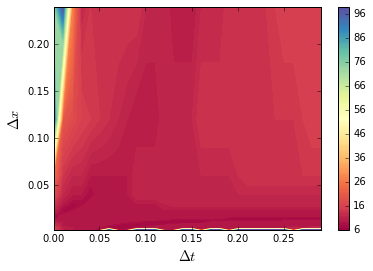

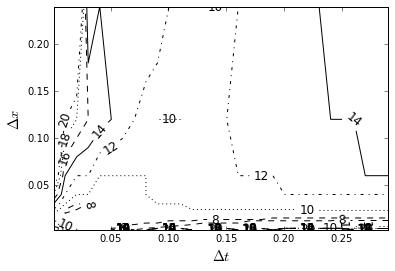

In [404]:
plotValidation(validateP)
plt.savefig("figures/TBCbesse/contourValidationP.png")

In [348]:
validateN = validateRegression(regN)



(0.000500,51) : 
(array([-0.08045484]), array([-0.08492455]), array([-0.08939426]), array([-0.09386398]), array([-0.09833369]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[18]
(0.00050000000000000001, 51, 18)


(0.000500,101) : 
(array([-0.0999448]), array([-0.10549729]), array([-0.11104978]), array([-0.11660227]), array([-0.12215476]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[12]
(0.00050000000000000001, 101, 12)


(0.000500,201) : 
(array([-0.13892473]), array([-0.14664277]), array([-0.15436081]), array([-0.16207885]), array([-0.16979689]))

*** Computing solution ...
*** End of computation ***

*** Computing solution ...
*** End of computation ***
[14]
(0.00050000000000000001, 201, 14)


(0.000500,301) : 
(array([-0.17790466]), array([-0.18778825]), array([-0.19767184]), array([-0.20755543]), array([-0.21743903]))

*** Computing solution ...
*** 

(30, 18)


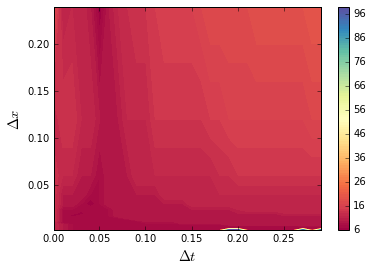

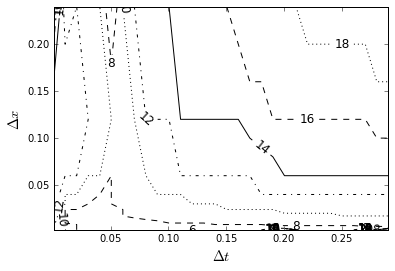

In [380]:
plotValidation(validateN)

[[ 0.012       2.28      ]
 [ 0.01263158  2.16      ]
 [ 0.01333333  2.06      ]
 [ 0.01411765  1.94      ]
 [ 0.015       1.83      ]
 [ 0.016       1.71      ]
 [ 0.01714286  1.6       ]
 [ 0.01846154  1.48      ]
 [ 0.02        1.37      ]
 [ 0.02181818  1.25      ]
 [ 0.024       1.14      ]
 [ 0.02666667  1.03      ]
 [ 0.03        0.91      ]
 [ 0.03428571  0.8       ]
 [ 0.04        0.68      ]
 [ 0.048       0.57      ]
 [ 0.06        0.457     ]
 [ 0.08        0.3605    ]
 [ 0.12        0.38275   ]]
[[ 0.012       3.6       ]
 [ 0.01263158  3.4       ]
 [ 0.01333333  3.3       ]
 [ 0.01411765  3.1       ]
 [ 0.015       2.9       ]
 [ 0.016       2.7       ]
 [ 0.01714286  2.5       ]
 [ 0.01846154  2.4       ]
 [ 0.02        2.2       ]
 [ 0.02181818  2.        ]
 [ 0.024       1.8       ]
 [ 0.02666667  1.6       ]
 [ 0.03        1.45      ]
 [ 0.03428571  1.3       ]
 [ 0.04        1.1       ]
 [ 0.048       0.9       ]
 [ 0.06        0.7       ]
 [ 0.08        0.6       ]


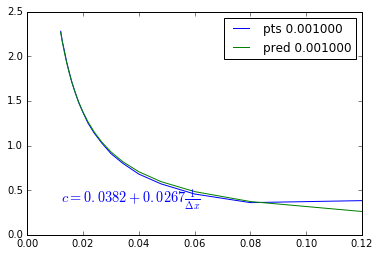

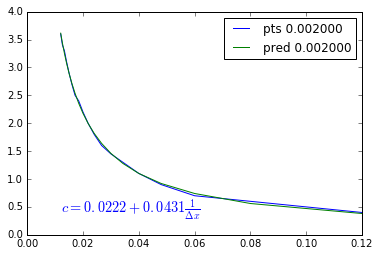

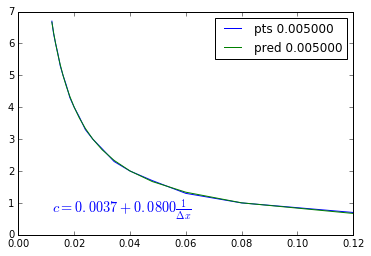

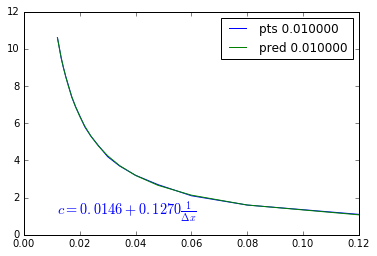

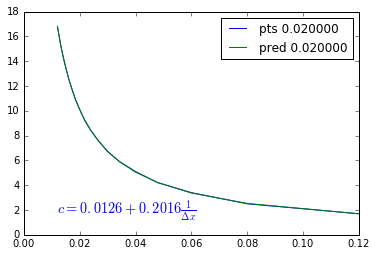

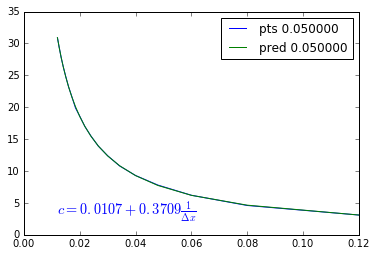

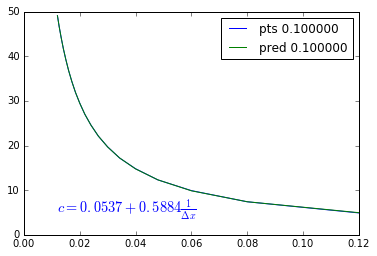

In [188]:
### Verify range of coefficients
##### for fixed dts

ls = lsP

dts = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1])


for dt in dts:
    aaa = np.zeros((1,2))
    for j in range(ls.shape[0]):
        if np.absolute(ls[j,0] - dt) < 1e-9 :
            line = np.zeros((1,2))
            line[0,0] = ls[j,1]
            line[0,1] = ls[j,2]
            aaa = np.vstack((aaa,line))
    aaa = np.delete(aaa,0,0)

    idxOrdered = np.argsort(aaa[:,0])
    aaa = aaa[idxOrdered,:]



    regP2 = linear_model.LinearRegression()
    regP2.fit(1./aaa[:,0].reshape(-1,1),aaa[:,1])
    regCoefsP2 = np.hstack((regP2.intercept_,regP2.coef_))
    pred = regP2.predict(1./aaa[:,0].reshape(-1,1))
    #print("P2:",regCoefsP2)
    #print(aaa[:,1],pred)

    plt.figure()
    plt.plot(aaa[:,0],aaa[:,1],label="pts %f"%dt)
    plt.plot(aaa[:,0],pred,label="pred %f"%dt)
    plt.annotate(r"$c = %.4f + %.4f \frac{1}{\Delta x}$"%(regP2.intercept_,regP2.coef_),
                 xy=(np.amin(aaa[:,0]),np.amin(aaa[:,1])),fontsize="x-large",color="blue")
    plt.legend()

    print(aaa)

In [292]:
dx = 12./50.
0.0146+0.1270/dx

0.5437666666666666

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700  750
  800  850  900  950 1000]
(50, array([[ 0.001,  3.28 ],
       [ 0.002,  1.69 ],
       [ 0.005,  0.88 ],
       [ 0.01 ,  0.22 ],
       [ 0.02 ,  0.93 ],
       [ 0.05 ,  1.56 ],
       [ 0.1  ,  2.448]]))
(100, array([[ 0.001  ,  0.38275],
       [ 0.002  ,  0.4    ],
       [ 0.005  ,  0.7    ],
       [ 0.01   ,  1.1    ],
       [ 0.02   ,  1.7    ],
       [ 0.05   ,  3.1    ],
       [ 0.1    ,  4.9    ]]))
(150, array([[ 0.001 ,  0.3605],
       [ 0.002 ,  0.6   ],
       [ 0.005 ,  1.    ],
       [ 0.01  ,  1.6   ],
       [ 0.02  ,  2.5   ],
       [ 0.05  ,  4.6   ],
       [ 0.1   ,  7.4   ]]))
(200, array([[ 0.001,  0.457],
       [ 0.002,  0.7  ],
       [ 0.005,  1.3  ],
       [ 0.01 ,  2.1  ],
       [ 0.02 ,  3.4  ],
       [ 0.05 ,  6.2  ],
       [ 0.1  ,  9.9  ]]))
(250, array([[  0.001,   0.57 ],
       [  0.002,   0.9  ],
       [  0.005,   1.7  ],
       [  0.01 ,   2.7  ],
       [  

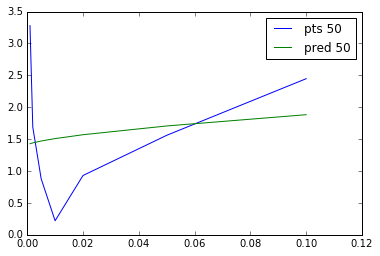

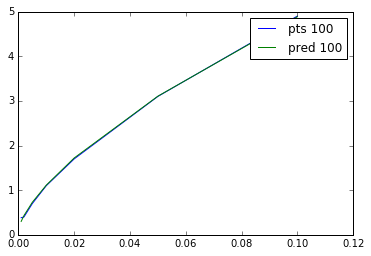

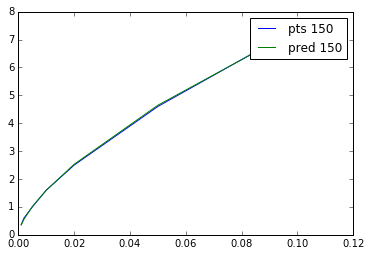

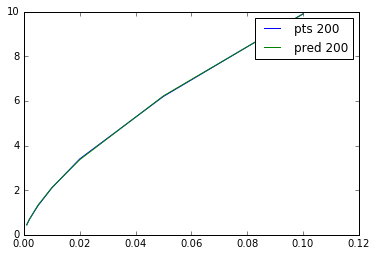

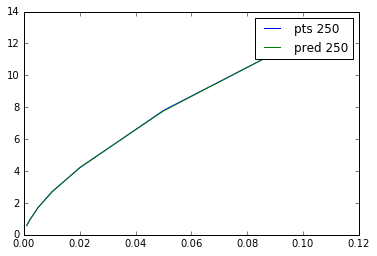

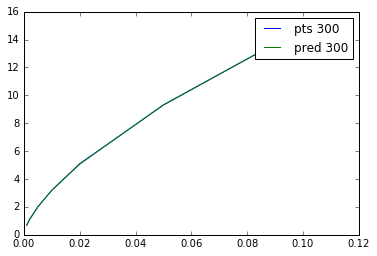

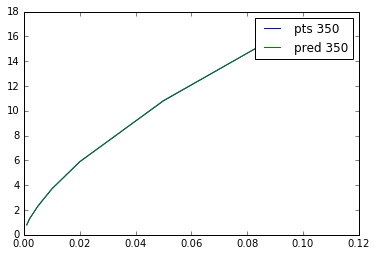

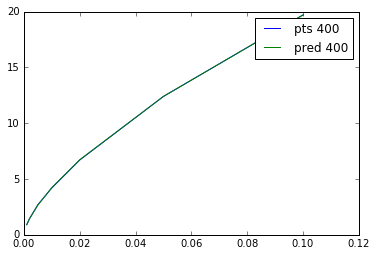

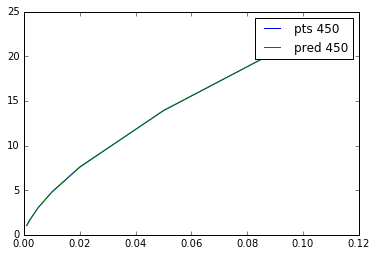

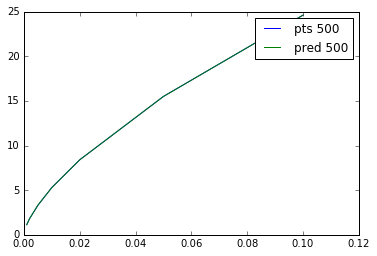

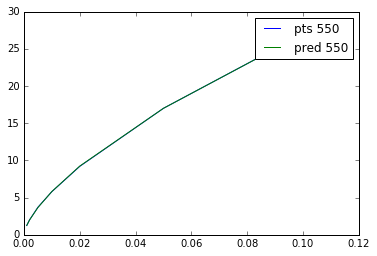

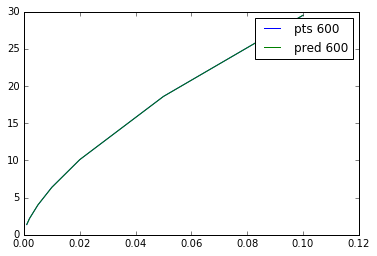

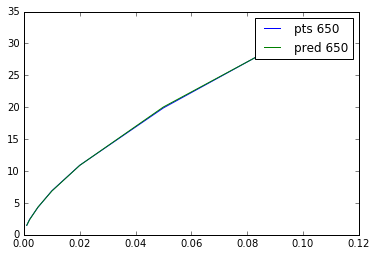

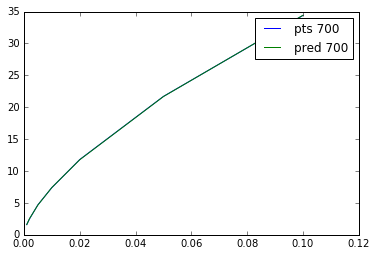

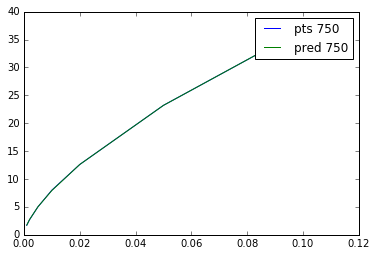

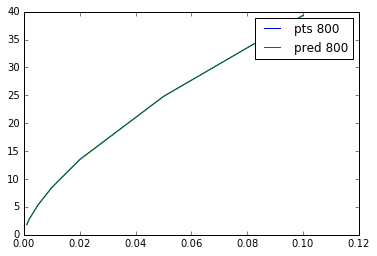

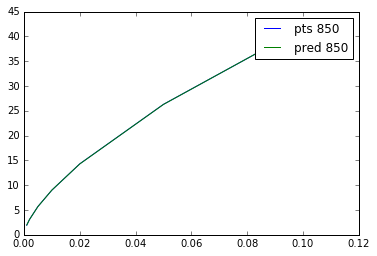

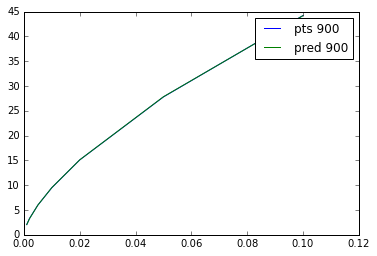

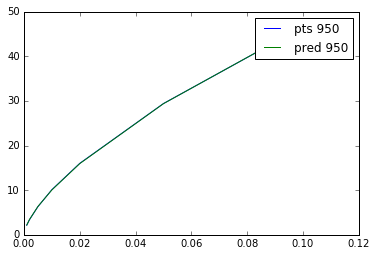

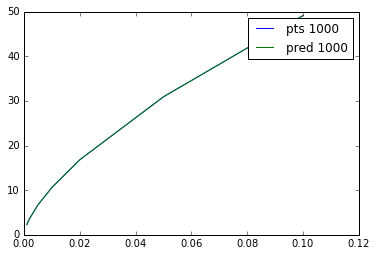

In [327]:
### Verify range of coefficients
##### for fixed dxs

ls = lsP

dt = 0.05
Ns = np.arange(50,1050,50)
print(Ns)


for N in Ns:
    dx = 12./N
    aaa = np.zeros((1,2))
    for j in range(ls.shape[0]):
        if np.absolute(ls[j,1] - dx) < 1e-6 :
            line = np.zeros((1,2))
            line[0,0] = ls[j,0]
            line[0,1] = ls[j,2]
            aaa = np.vstack((aaa,line))
    aaa = np.delete(aaa,0,0)

    idxOrdered = np.argsort(aaa[:,0])
    aaa = aaa[idxOrdered,:]


    realpts = np.sqrt(aaa[:,0]).reshape(-1,1)
    realpts = np.power(aaa[:,0],2./3.).reshape(-1,1)
    
    regP2 = linear_model.LinearRegression()
    regP2.fit(realpts,aaa[:,1])
    regCoefsP2 = np.hstack((regP2.intercept_,regP2.coef_))
    pred = regP2.predict(realpts)
    #print("P2:",regCoefsP2)
    #print(aaa[:,1],pred)

    plt.figure()
    plt.plot(aaa[:,0],aaa[:,1],label="pts %d"%N)
    plt.plot(aaa[:,0],pred,label="pred %d"%N)
    plt.legend()

    print(N,aaa)